# Profiling Julia code

In [39]:
using Base.Profile

In [6]:
function examplefunc(x)
    x = x + 2
    x = 2 * x
    return x
end

examplefunc (generic function with 1 method)

In [144]:
aux = rand(10000);

In [145]:
Profile.clear()

In [146]:
@time examplefunc(aux);

  0.004436 seconds (469 allocations: 185.503 KiB)


In [147]:
@profile examplefunc(aux);

In [148]:
Profile.print()

running it multiple times), or adjust the delay between samples with
Profile.init().


In [149]:
@profile (for i = 1:100; examplefunc(aux); end)

In [151]:
Profile.print()

4 ./task.jl:335; (::IJulia.##11#14)()
 4 ...IJulia/src/eventloop.jl:8; eventloop(::ZMQ.Socket)
  4 ...src/execute_request.jl:160; execute_request(::ZMQ.Socket, ::I...
   4 ...ia/lib/julia/sys.dylib:?; include_string(::String, ::String)
    4 ./<missing>:?; anonymous
     4 ./profile.jl:23; macro expansion
      4 ./In[149]:1; macro expansion
       4 ./In[143]:3; examplefunc
        4 ./arraymath.jl:44; *(::Int64, ::Array{Float64,1})
         4 ./broadcast.jl:434; broadcast
          4 ./broadcast.jl:314; broadcast_c
           4 ./broadcast.jl:266; broadcast_t


In [152]:
Profile.print(C=true)

4 ..._9-x64/build/src/task.c:267; start_task
 4 ...64/build/src/./julia.h:1424; jl_apply
   4 ./task.jl:335; (::IJulia.##11#14)()
    4 ...Julia/src/eventloop.jl:8; eventloop(::ZMQ.Socket)
     4 .../build/src/builtins.c:464; jl_f__apply_latest
      4 ...build/src/builtins.c:426; jl_f__apply
       4 ...build/src/./julia.h:1424; jl_apply
         4 .../execute_request.jl:160; execute_request(::ZMQ.Socket,...
          4 ...lib/julia/sys.dylib:?; include_string(::String, ::String)
           4 ...64/build/src/ast.c:873; jl_parse_eval_all
            4 ...ild/src/toplevel.c:589; jl_toplevel_eval_flex
             4 .../julia_internal.h:358; jl_call_method_internal
              4 .../julia_internal.h:339; jl_call_fptr_internal
               4 ./<missing>:?; anonymous
                4 ./profile.jl:23; macro expansion
                 4 ./In[149]:1; macro expansion
                  4 ./In[143]:3; examplefunc
                    4 ./arraymath.jl:44; *(::Int64, ::Array{Floa...
          

#### example 2

In [136]:
Profile.clear()

In [137]:
function testfunc()
    x = rand(10000, 1000)
    y = std(x, 1)
    return y
end

testfunc (generic function with 1 method)

In [138]:
@profile testfunc()

1×1000 Array{Float64,2}:
 0.287737  0.289342  0.287736  0.290109  …  0.288354  0.290238  0.288198

In [142]:
Profile.print()

33 ./task.jl:335; (::IJulia.##11#14)()
 33 ...IJulia/src/eventloop.jl:8; eventloop(::ZMQ.Socket)
  32 ...rc/execute_request.jl:160; execute_request(::ZMQ.Socket, ::I...
   32 ...ia/lib/julia/sys.dylib:?; include_string(::String, ::String)
    32 ./<missing>:?; anonymous
     32 ./profile.jl:23; macro expansion
      23 ./In[137]:2; testfunc()
       17 ./random.jl:433; rand!(::MersenneTwister, ::Arr...
        17 ./dSFMT.jl:84; dsfmt_fill_array_close_open!(:...
       6  ./random.jl:280; rand
        6 ./random.jl:279; rand
         6 ./random.jl:368; rand
          6 ./random.jl:371; rand
      9  ./In[137]:3; testfunc()
       9 ./<missing>:0; (::Base.#kw##var)(::Array{Any,1}...
        9 ./statistics.jl:204; #var#534(::Bool, ::Void, ::Fun...
         5 ./<missing>:0; (::Base.#kw##varm)(::Array{Any...
          5 ./<missing>:0; (::Base.#kw##varm!)(::Array{An...
           5 ./statistics.jl:162; #varm!#531(::Bool, ::Functio...
            5 ./statistics.jl:121; centralize_sumabs2!(::A

In [4]:
using ProfileView

INFO: Precompiling module ProfileView.
INFO: Precompiling module ProfileViewSVG.


In [10]:
function profile_test(n)
    for i = 1:n
        A = randn(100,100,20)
        m = maximum(A)
        Afft = fft(A)
        Am = mapslices(sum, A, 2)
        B = A[:,:,5]
        Bsort = mapslices(sort, B, 1)
        b = rand(100)
        C = B.*b
    end
end

profile_test (generic function with 1 method)

In [11]:
profile_test(1) # run once to trigger compilation
Profile.clear()  # in case we have any previous profiling data
@profile  profile_test(100)

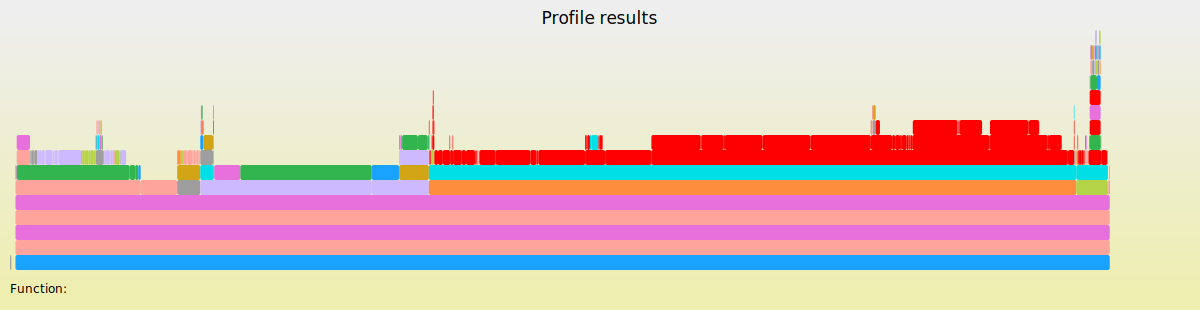

In [16]:
 ProfileView.view()